In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [4]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


# Post pruining decision trees using cost complexity pruining

Decision tree has parameters such as min_sample_leaf and max_depth to prevent a tree from overfitting. Cost complexity pruining also provide another way to control the size of a tree.
this pruining technique is parameterized by the cost complexity parameter , ccp_alpha.
greater the value of ccp_alpha increase the number of nodes pruned, Here we only show the effect of ccp_alpha on regularising the trees and how to choose ccp_alpha on the basis of validation score.

    See also minimal_cost_complexity_pruining for details on pruining  

In [14]:
print(__doc__)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

Automatically created module for IPython interactive environment


In [19]:
 X, y = load_breast_cancer(return_X_y = True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("acc = ", accuracy_score(y_test, pred))

acc =  0.8811188811188811


[Text(0.5595238095238095, 0.9444444444444444, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.23809523809523808, 0.7222222222222222, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'x[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'x[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(0.14285714285714285, 0.166666666666

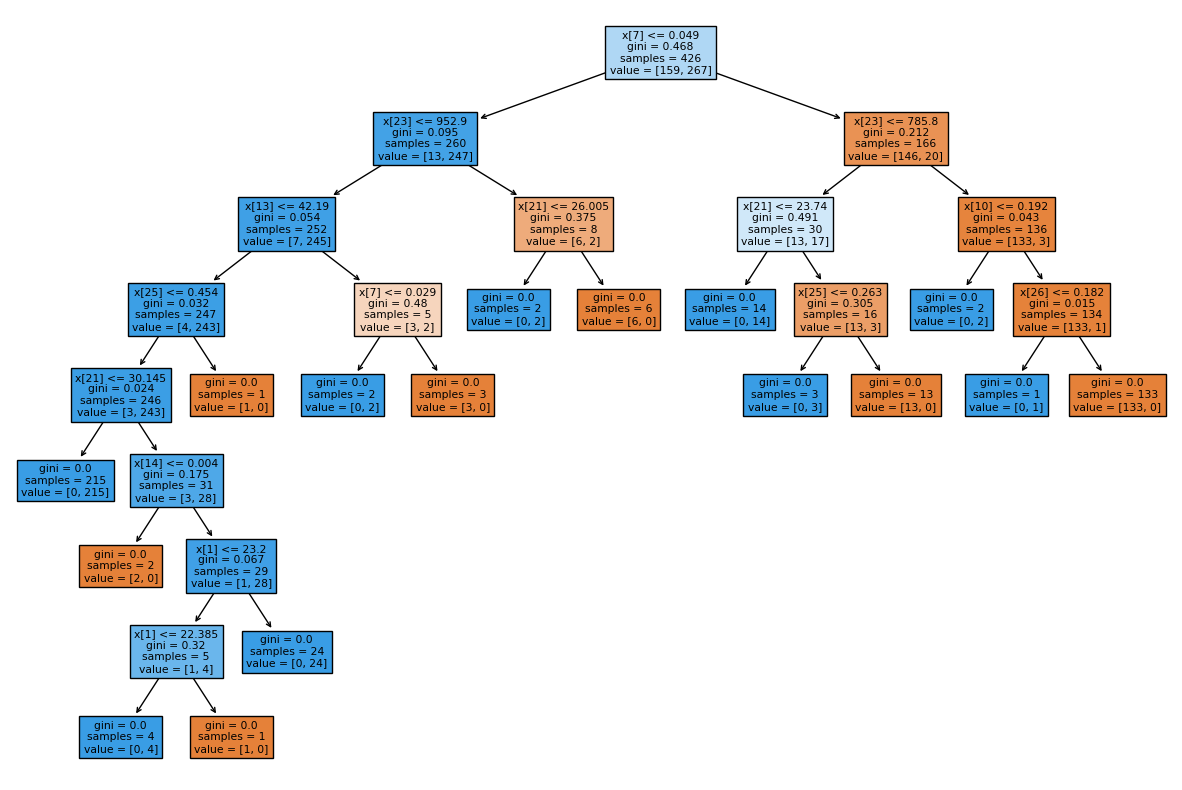

In [34]:
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(clf, filled = True)

In [37]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [67]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [68]:
import numpy as np
#del ccp_alpha[-1]
ccp_alphas = np.delete(ccp_alphas,-1)

In [69]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("The number of nodes in the decision tree is: {} with ccp_alpha: {} ".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

The number of nodes in the decision tree is: 3 with ccp_alpha: 0.03422474765119576 


In [70]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0)]

For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node Here we show that the number of nodes and tree depth decreases as alpha increases.

# Accuracy vs Alpha for training and testing sets.

When ccp_alpha is set to zero and keeping the other default parameters of :class: Decision TreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

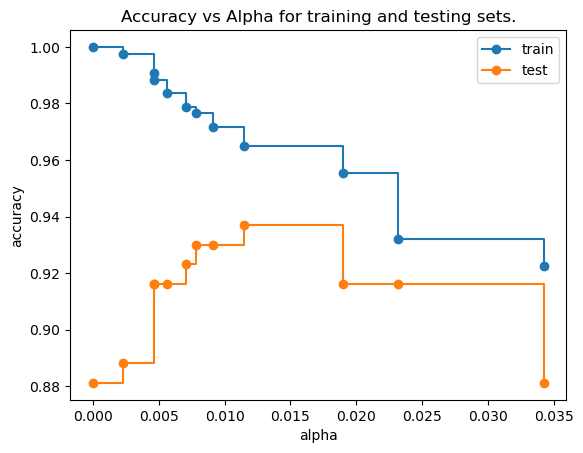

In [71]:
training_scores = [clf.score(X_train, y_train) for clf in clfs]
testing_scores = [clf.score(X_test, y_test) for clf in clfs]

clf, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets.")
ax.plot(ccp_alphas, training_scores, marker = "o", label = "train", drawstyle="steps-post")
ax.plot(ccp_alphas, testing_scores, marker = "o", label = "test", drawstyle="steps-post")
ax.legend()
plt.show()

In [74]:
clf = DecisionTreeClassifier(random_state = 0, ccp_alpha=0.017)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.017, random_state=0)

In [76]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9370629370629371

[Text(0.5, 0.875, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.125, 0.375, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.375, 0.375, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.625, 'x[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.375, 'x[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.875, 0.375, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

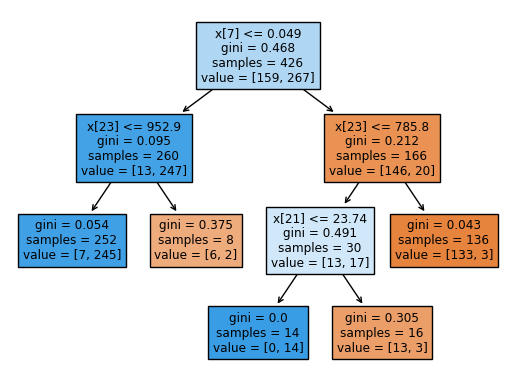

In [78]:
tree.plot_tree(clf, filled = True)